In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

In [2]:
df = pd.read_csv("data/raw/eda.csv")
print(df.shape)
df.head()

(18526, 21)


,label,order_id,cabinet,item_name,color,length,width,e_ship_date,area,area_prob,...,color_num,cabinet_num,color_cabinet_num,color_item_num,item_num,color1_num,cabinet1_num,color_cabinet1_num,color_item1_num,item1_num
0,1,BC11205013,01_矮櫃,背拉,*不拘_18,443.0,96.0,2024-05-03,42528.0,0.004725,...,0.000768,0.002519,0.047619,1.000000,1.0,1.000000,0.142857,1.0,1.00,1.0
1,0,BS11202160,01_矮櫃,背拉,*不拘_18,964.0,96.0,2024-03-01,92544.0,0.010283,...,0.001536,0.005038,0.095238,0.052632,0.5,0.027027,0.038462,0.5,0.25,0.5
2,2,BS11202160,01_矮櫃,背拉,*不拘_18,964.0,96.0,2024-03-01,92544.0,0.010283,...,0.002304,0.007557,0.142857,0.105263,1.0,0.054054,0.076923,1.0,0.50,1.0
3,0,BS11202160,03_矮櫃,背拉,*不拘_18,964.0,96.0,2024-03-01,92544.0,0.010283,...,0.003072,0.004348,0.071429,0.157895,0.5,0.081081,0.052632,0.5,0.75,0.5
4,3,BS11202160,03_矮櫃,背拉,*不拘_18,964.0,96.0,2024-03-01,92544.0,0.010283,...,0.003840,0.008696,0.142857,0.210526,1.0,0.108108,0.105263,1.0,1.00,1.0


In [3]:
import pickle, os
input_ = {
    "model_id": "20230710105600",
}

model_id = input_["model_id"]

root = os.getcwd()

# 取得model位置
model_path = os.path.join(root, "data", "train", model_id)
os.makedirs(model_path, exist_ok = True)

model_detail = os.path.join(model_path, "model")
os.makedirs(model_detail, exist_ok = True)

In [4]:
train_drop_index = pickle.load(open(os.path.join(model_detail, "train_drop_index.pkl"), "rb"))
test_drop_index = pickle.load(open(os.path.join(model_detail, "test_drop_index.pkl"), "rb"))

df = df.drop(train_drop_index + test_drop_index, axis = 0).reset_index(drop = True)
print(df.shape)

(16419, 21)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16419 entries, 0 to 16418
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   label               16419 non-null  int64  
 1   order_id            16419 non-null  object 
 2   cabinet             16408 non-null  object 
 3   item_name           16416 non-null  object 
 4   color               16414 non-null  object 
 5   length              16419 non-null  float64
 6   width               16419 non-null  float64
 7   e_ship_date         16419 non-null  object 
 8   area                16419 non-null  float64
 9   area_prob           16419 non-null  float64
 10  waste               16419 non-null  float64
 11  color_num           16419 non-null  float64
 12  cabinet_num         16419 non-null  float64
 13  color_cabinet_num   16419 non-null  float64
 14  color_item_num      16419 non-null  float64
 15  item_num            16419 non-null  float64
 16  colo

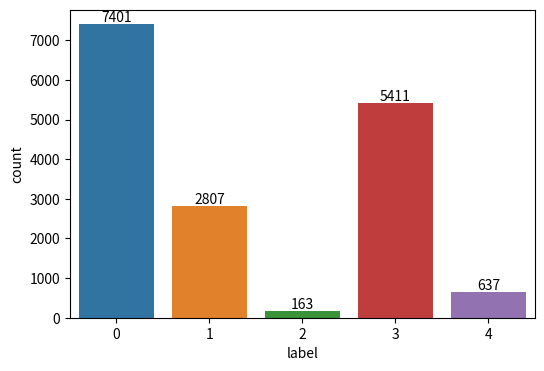

In [6]:
plt.figure(figsize = (6, 4))
fig = sns.countplot(data = df, x = "label")
for p in fig.patches:
    fig.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.show()

In [7]:
corr = df.select_dtypes("number").corr("spearman")
# corr.loc["color_item_num", "label"] = 0.55
# corr.loc["label", "color_item_num"] = 0.55
# corr.loc["item_num", "label"] = 0.62
# corr.loc["label", "item_num"] = 0.62

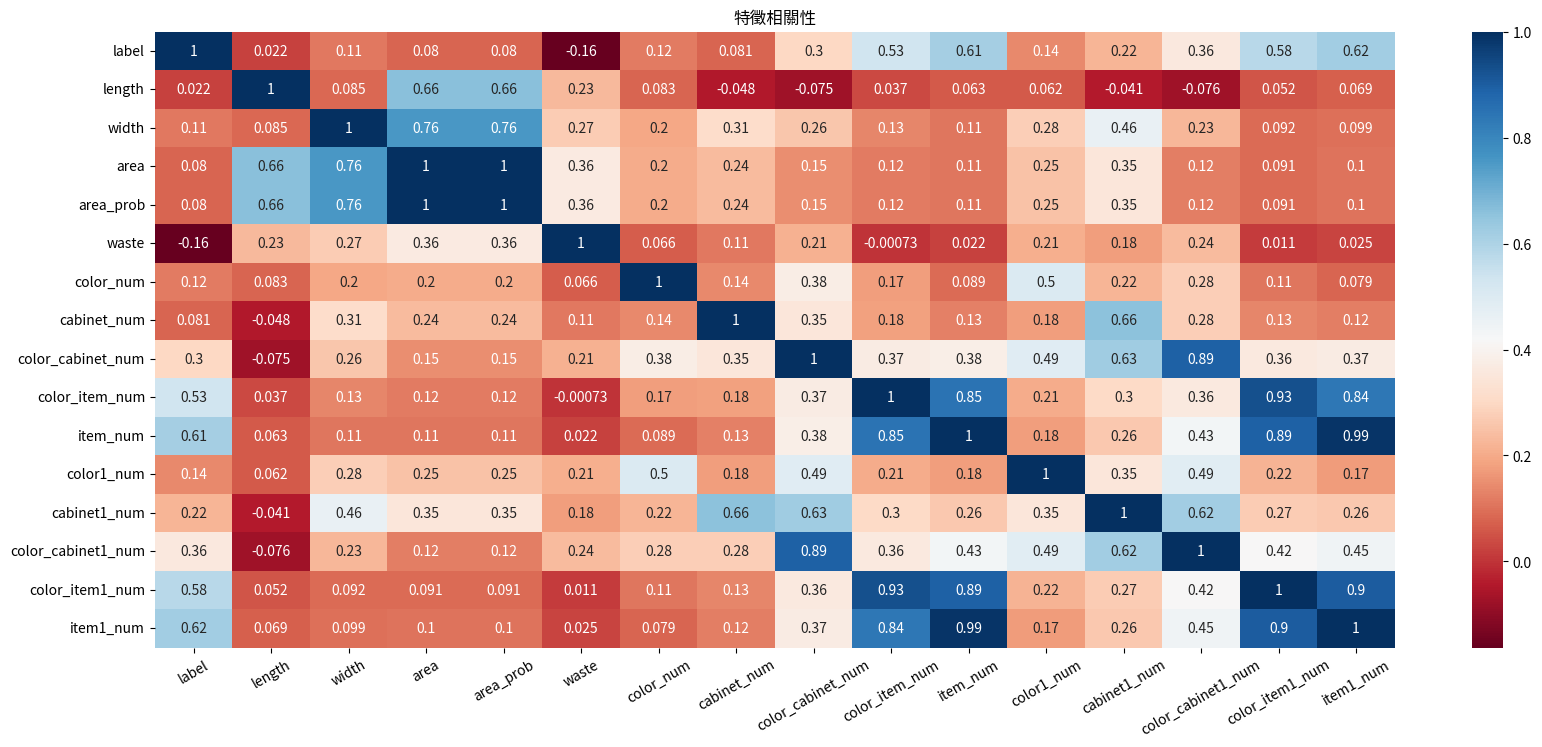

In [8]:
plt.figure(figsize=(20, 8))

sns.heatmap(data = corr, annot=True, cmap = 'RdBu')
plt.xticks(rotation = 30)
title = '特徵相關性'
plt.title(title)
plt.show()

In [9]:
cat_col = ['order_id', 'cabinet', 'item_name', 'color', 'e_ship_date']
num_col = ['length', 'width']
add_col = ['area', 'area_prob', 'waste', 'color_num', 'cabinet_num', 'color_cabinet_num', 'color_item_num', 'item_num']

<Axes: >

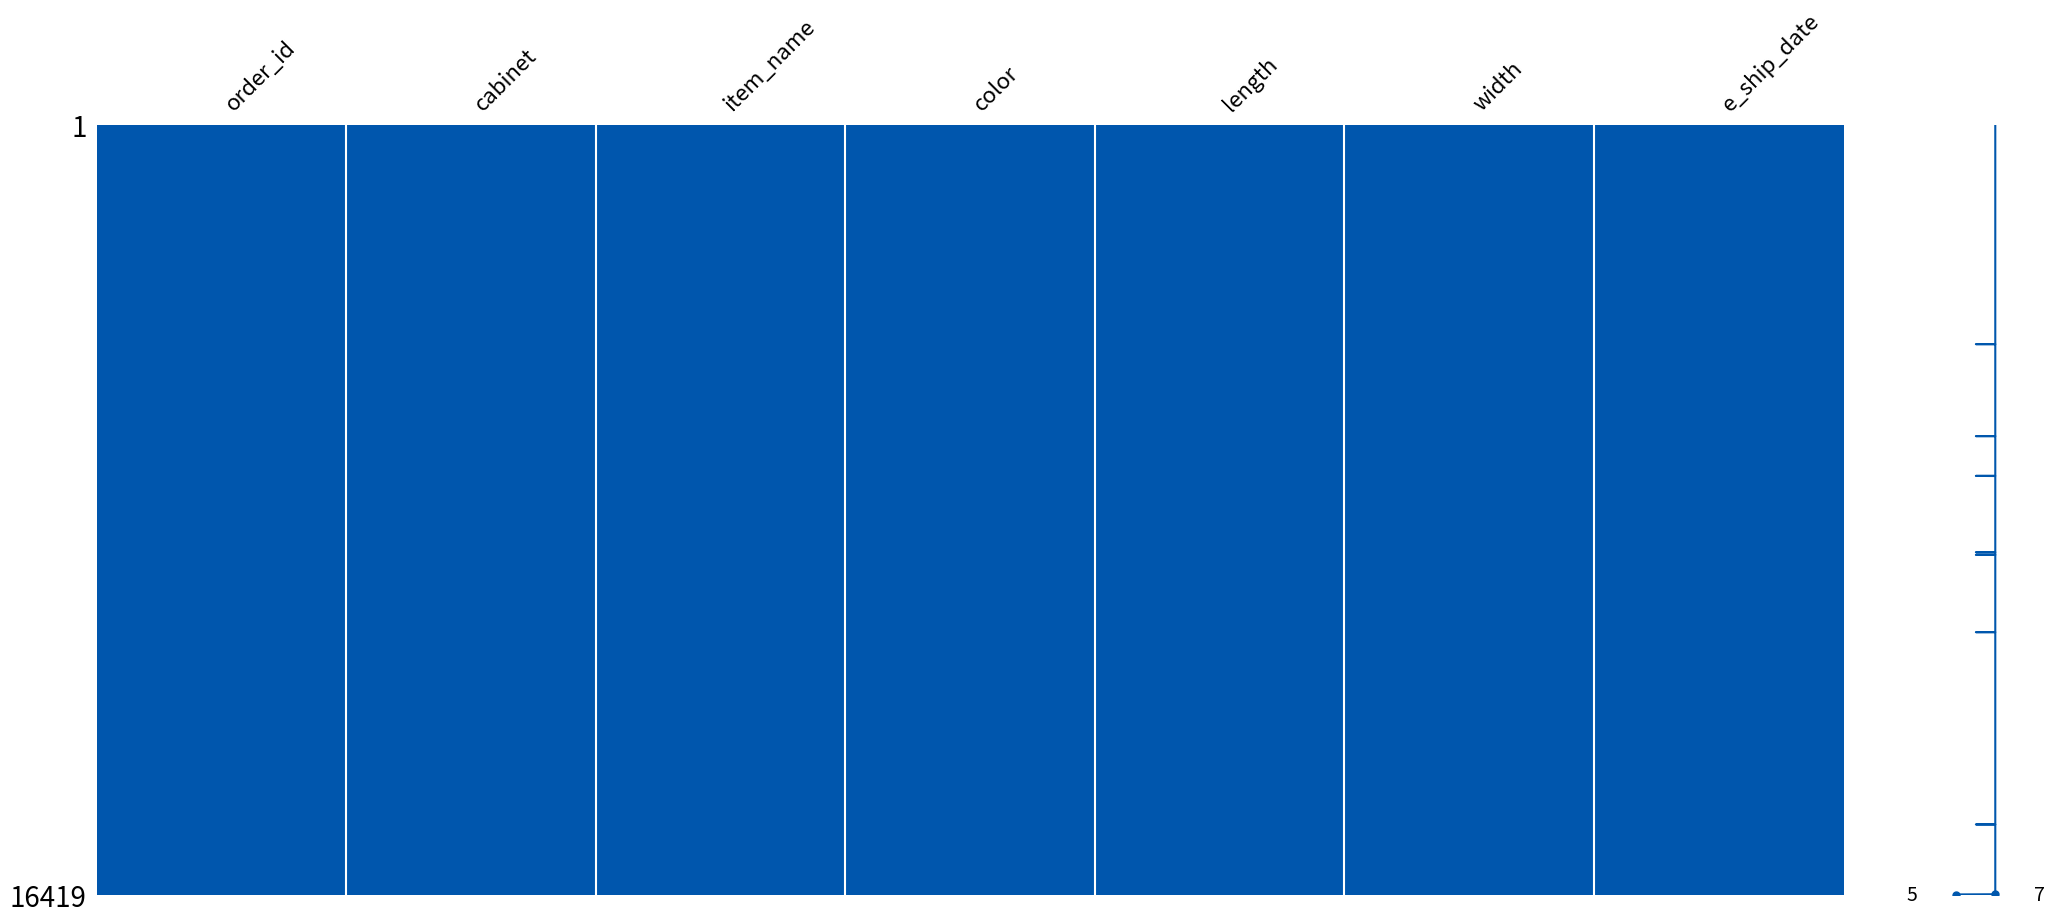

In [10]:
import missingno as msno
msno.matrix(df.iloc[:, 1:8], color = (0, 0.34, 0.68))

444


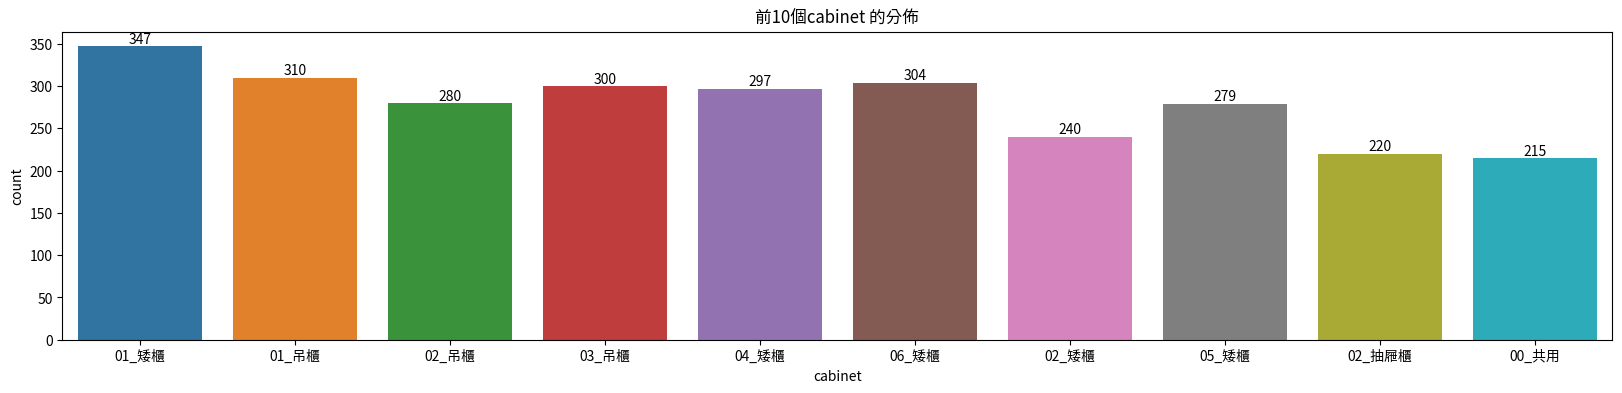

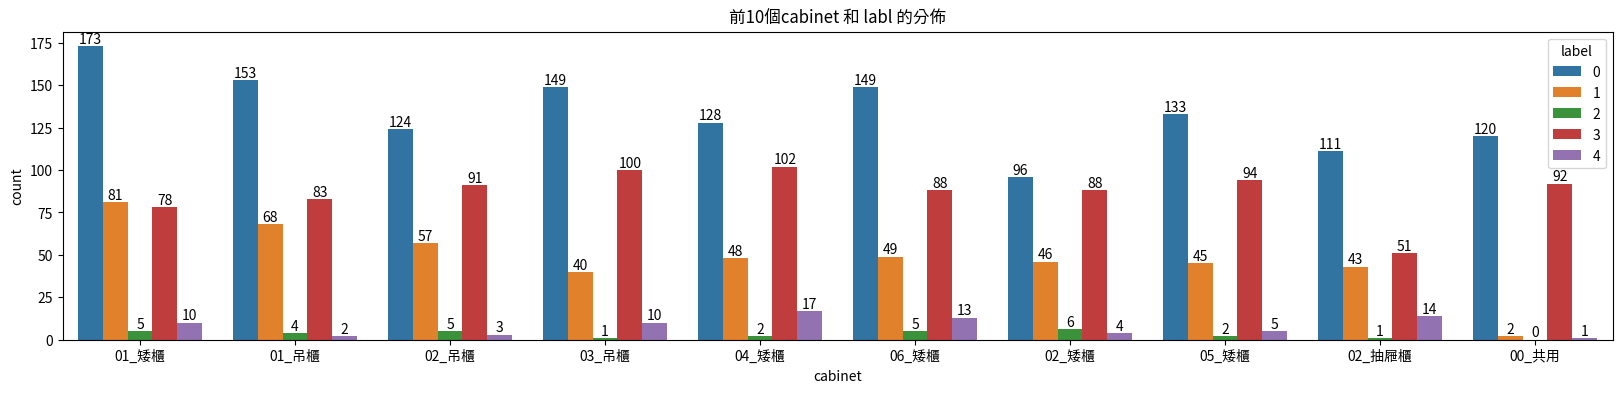

In [11]:
col = "cabinet"
count = df[col].value_counts()
top10 = count.index.to_list()[:10]
df1 = df.query(f"{col} in @top10")
print(len(count))

plt.figure(figsize = (20, 4))
fig = sns.countplot(data = df1, x = col)
for p in fig.patches:
    fig.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.title(label = f"前10個{col} 的分佈")
plt.show()

plt.figure(figsize = (20, 4))
fig = sns.countplot(data = df1, x = col, hue = "label")
for p in fig.patches:
    fig.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.title(label = f"前10個{col} 和 labl 的分佈")
plt.show()

248


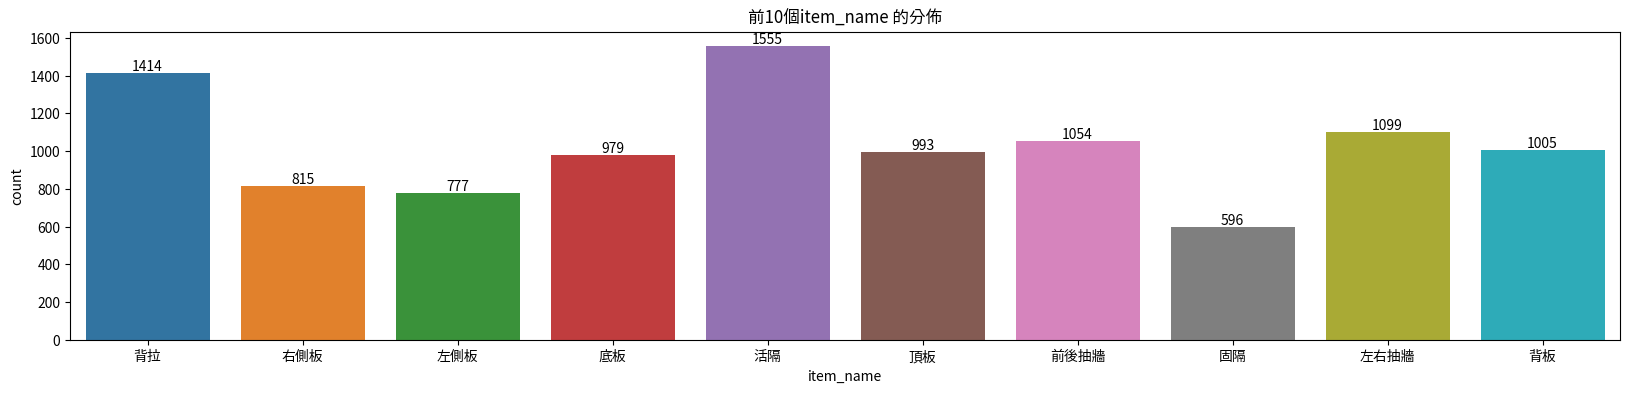

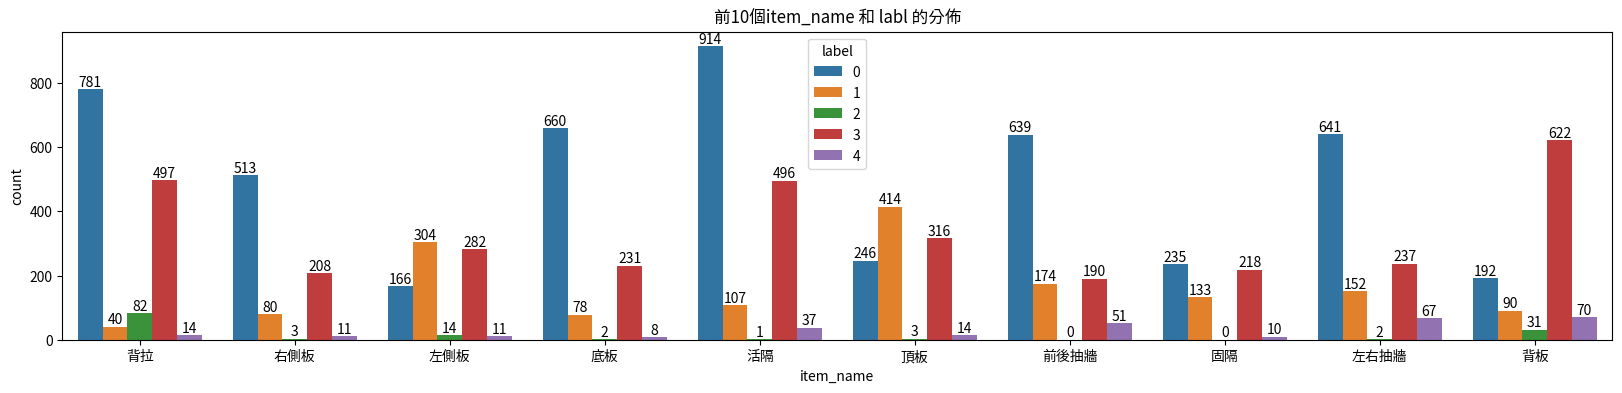

In [12]:
col = "item_name"
count = df[col].value_counts()
top10 = count.index.to_list()[:10]
df1 = df.query(f"{col} in @top10")
print(len(count))

plt.figure(figsize = (20, 4))
fig = sns.countplot(data = df1, x = col)
for p in fig.patches:
    fig.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.title(label = f"前10個{col} 的分佈")
plt.show()

plt.figure(figsize = (20, 4))
fig = sns.countplot(data = df1, x = col, hue = "label")
for p in fig.patches:
    fig.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.title(label = f"前10個{col} 和 labl 的分佈")
plt.show()

185


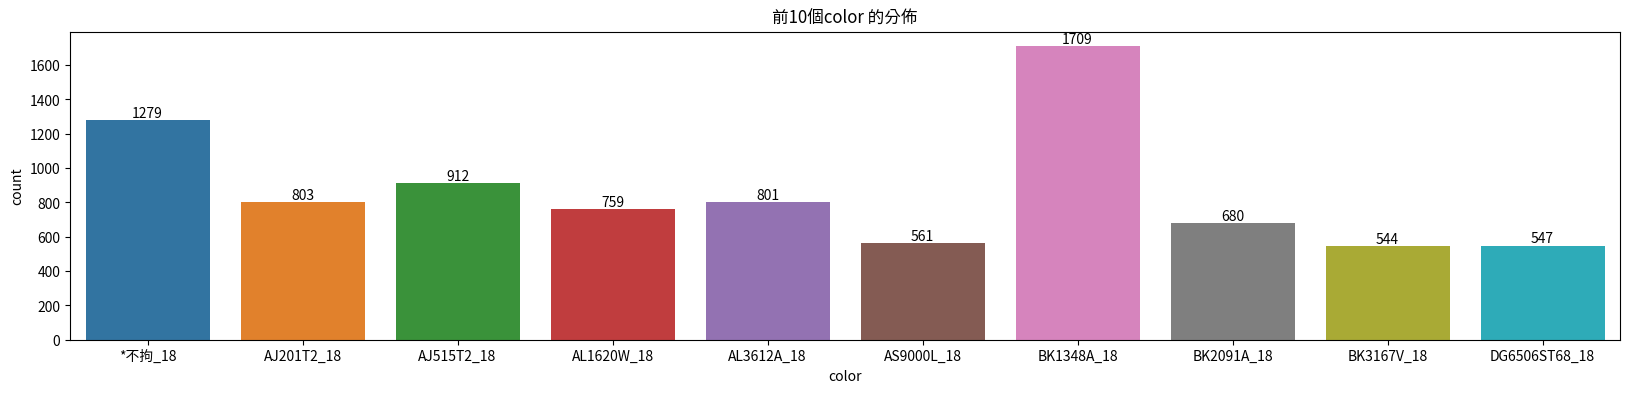

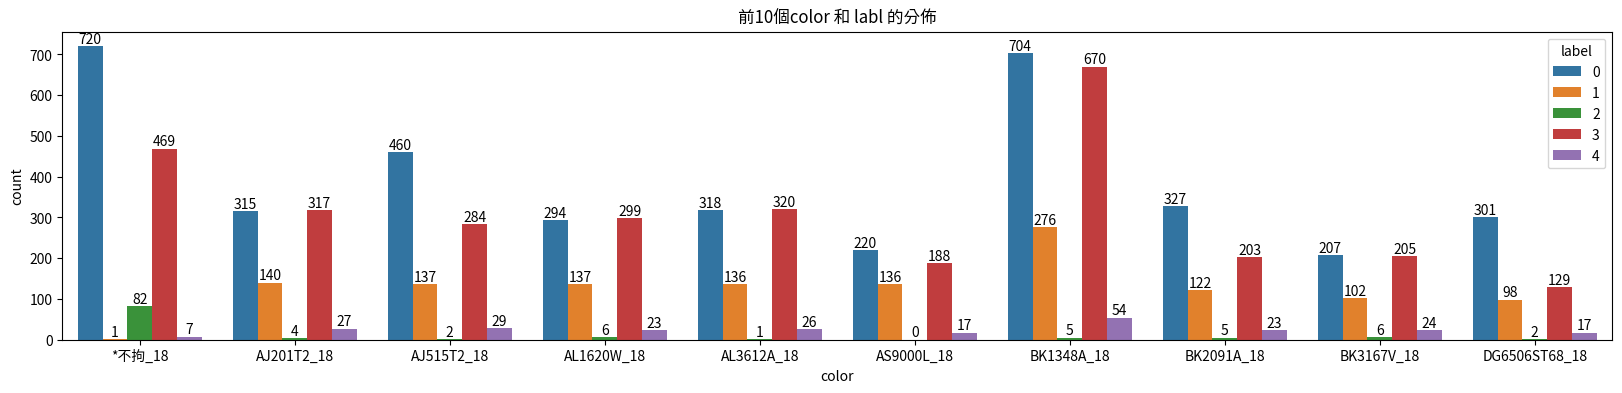

In [13]:
col = "color"
count = df[col].value_counts()
top10 = count.index.to_list()[:10]
df1 = df.query(f"{col} in @top10")
print(len(count))

plt.figure(figsize = (20, 4))
fig = sns.countplot(data = df1, x = col)
for p in fig.patches:
    fig.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.title(label = f"前10個{col} 的分佈")
plt.show()

plt.figure(figsize = (20, 4))
fig = sns.countplot(data = df1, x = col, hue = "label")
for p in fig.patches:
    fig.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.title(label = f"前10個{col} 和 labl 的分佈")
plt.show()

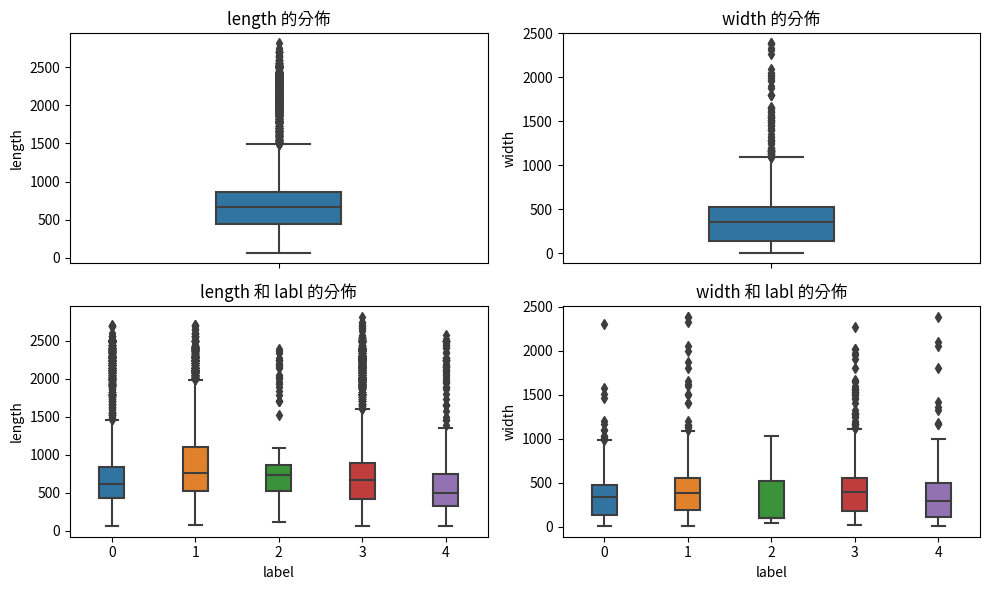

In [14]:
a, b = 2, 2
fig, ax = plt.subplots(a, b, figsize = (10, 6))
for j in range(b):
    col = num_col[j]
    sns.boxplot(y = col, data = df, width = 0.3, ax = ax[0, j])
    sns.boxplot(y = col, x = "label", data = df, width = 0.3, ax = ax[1, j])
    ax[0, j].set(title = f"{col} 的分佈")
    ax[1, j].set(title = f"{col} 和 labl 的分佈")
    
plt.tight_layout()
plt.show()

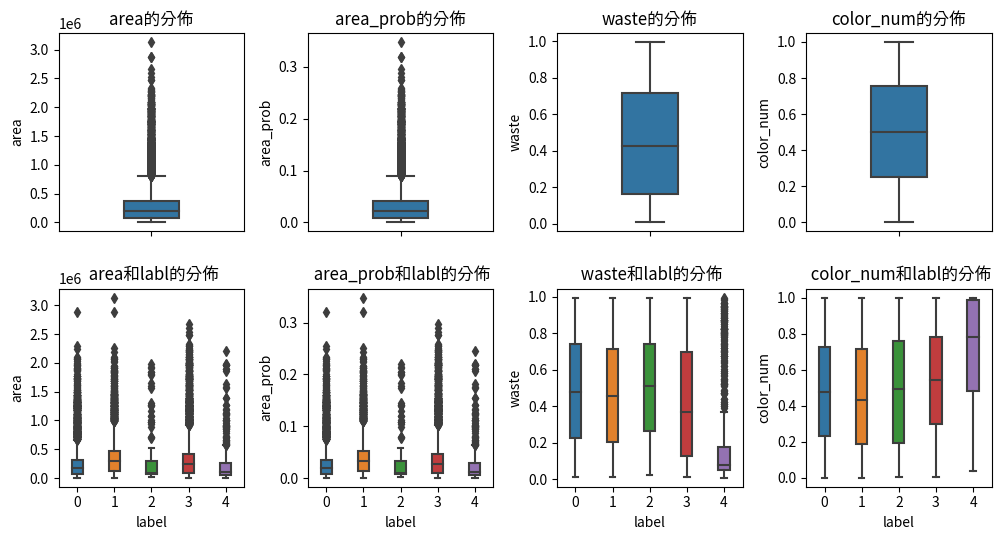

In [15]:
a, b = 2, 4
fig, ax = plt.subplots(a, b, figsize = (10, 5.5))
for j in range(b):
    col = add_col[j]
    sns.boxplot(y = col, data = df, width = 0.3, ax = ax[0, j])
    sns.boxplot(y = col, x = "label", data = df, width = 0.3, ax = ax[1, j])
    ax[0, j].set(title = f"{col}的分佈")
    ax[1, j].set(title = f" {col}和labl的分佈")
    
plt.tight_layout()
plt.show()

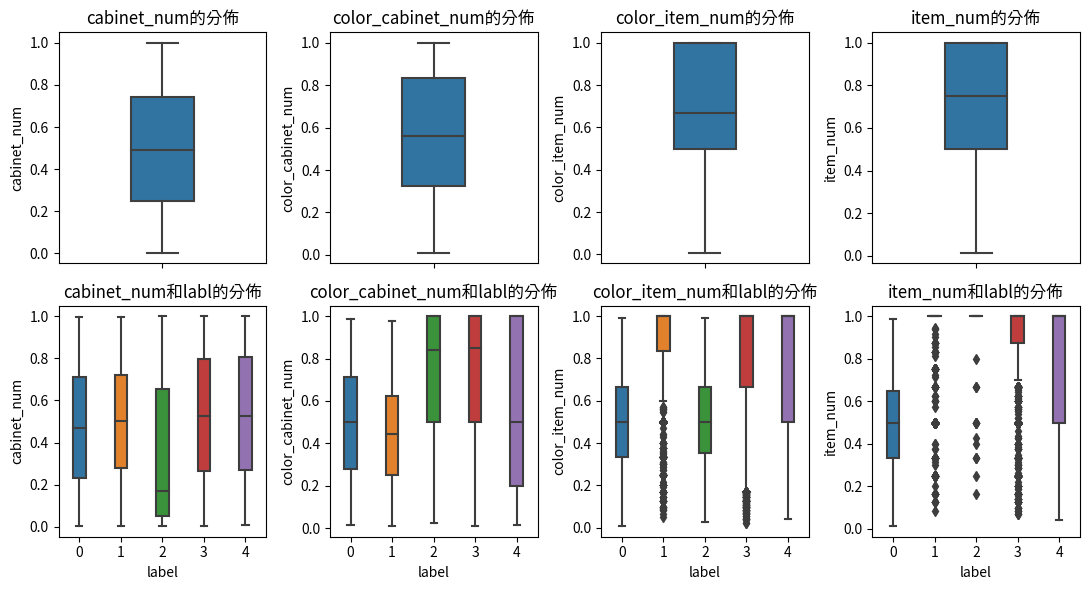

In [16]:
a, b = 2, 4
fig, ax = plt.subplots(a, b, figsize = (11, 6))
for j in range(b):
    col = add_col[4:][j]
    sns.boxplot(y = col, data = df, width = 0.3, ax = ax[0, j])
    sns.boxplot(y = col, x = "label", data = df, width = 0.3, ax = ax[1, j])
    ax[0, j].set(title = f"{col}的分佈")
    ax[1, j].set(title = f"{col}和labl的分佈")
    
plt.tight_layout()
plt.show()

In [17]:
import random

r = 25
df1 = pd.DataFrame()
df1["日期"] = pd.date_range(start = "2023-06", freq = "D", periods=r).astype(str)
df1["耗損率"] = [random.uniform(0.05, 0.30) for i in range(r)]
df1["片數"] = [random.randint(100, 500) for i in range(r)]
df1["平均耗損率"] = df1["耗損率"].cumsum() / (df1["耗損率"].index + 1)
df1 = df1.iloc[-10:]
df1.loc[:, "耗損率":] = df1.loc[:, "耗損率":].round(3)
df1

,日期,耗損率,片數,平均耗損率
15,2023-06-16,0.100,182,0.179
16,2023-06-17,0.056,384,0.171
17,2023-06-18,0.147,404,0.170
18,2023-06-19,0.286,100,0.176
19,2023-06-20,0.206,375,0.178
20,2023-06-21,0.212,476,0.179
21,2023-06-22,0.081,309,0.175
22,2023-06-23,0.274,400,0.179
23,2023-06-24,0.264,347,0.183
24,2023-06-25,0.195,240,0.183


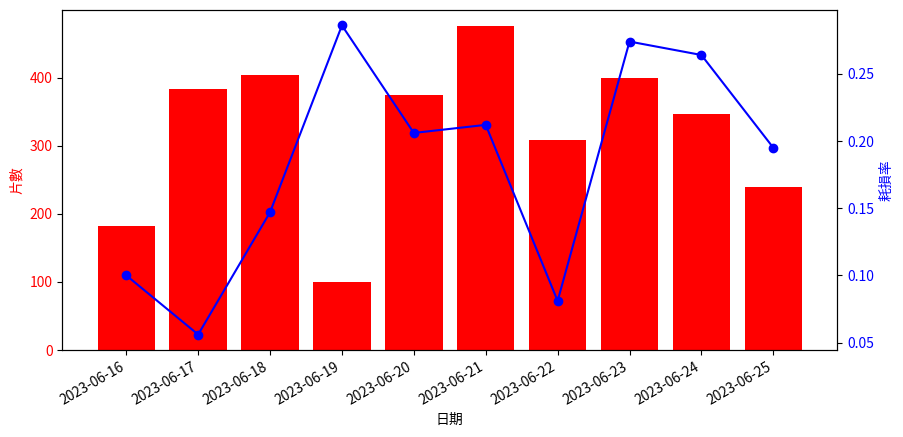

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# 創建圖形和軸物件
fig, ax1 = plt.subplots(figsize = (10, 5))

# 繪製柱狀圖 - 片數
ax1.bar(df1['日期'], df1['片數'], color='red')
ax1.set_xlabel('日期')
ax1.set_ylabel('片數', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# 建立第二個y軸 - 耗損率
ax2 = ax1.twinx()
ax2.plot(df1['日期'], df1['耗損率'], marker='o', color='blue')
ax2.set_ylabel('耗損率', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')


# 自動調整x軸標籤的間距
fig.autofmt_xdate()

# 顯示圖表
plt.show()


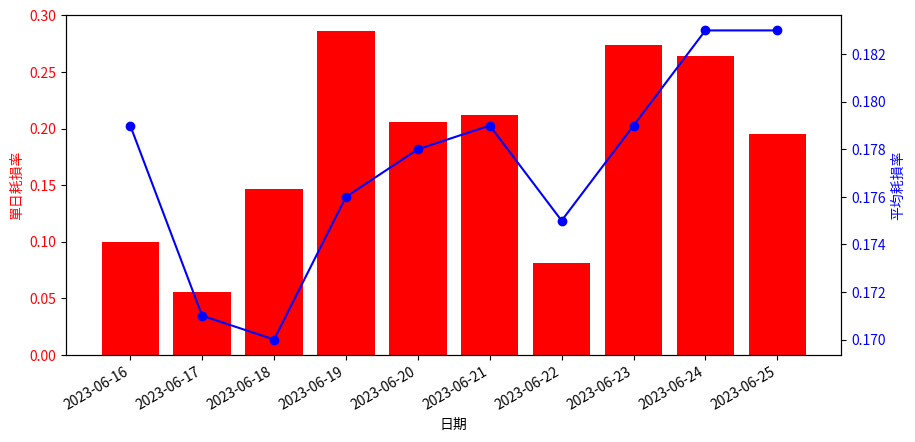

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# 創建圖形和軸物件
fig, ax1 = plt.subplots(figsize = (10, 5))

# 繪製柱狀圖 - 耗損率
ax1.bar(df1['日期'], df1['耗損率'], color='red')
ax1.set_xlabel('日期')
ax1.set_ylabel('單日耗損率', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# 建立第二個y軸 - 平均耗損率
ax2 = ax1.twinx()
ax2.plot(df1['日期'], df1['平均耗損率'], marker='o', color='blue')
ax2.set_ylabel('平均耗損率', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')


# 自動調整x軸標籤的間距
fig.autofmt_xdate()

# 顯示圖表
plt.show()


#### Musesai autofeat

In [20]:
import pandas as pd

train = pd.read_csv(r"C:\Users\tzuli\Documents\python\ChuanMai\data\raw\musesai\20230630075915183_servtech.ai_p00234_AF_train.csv")
eda = pd.read_csv(r"C:\Users\tzuli\Documents\python\ChuanMai\data\raw\eda.csv")

In [21]:
train = train[list(set(train.columns) - set(eda.columns[1:]))]

In [22]:
import random
corr = train.corr().round(2)
keep_col_l = abs(corr["label"]).sort_values(ascending = False).index[:20].to_list()
# random.shuffle(keep_col_l)
keep_col_l = keep_col_l[:10]
corr = corr.loc[keep_col_l, keep_col_l]

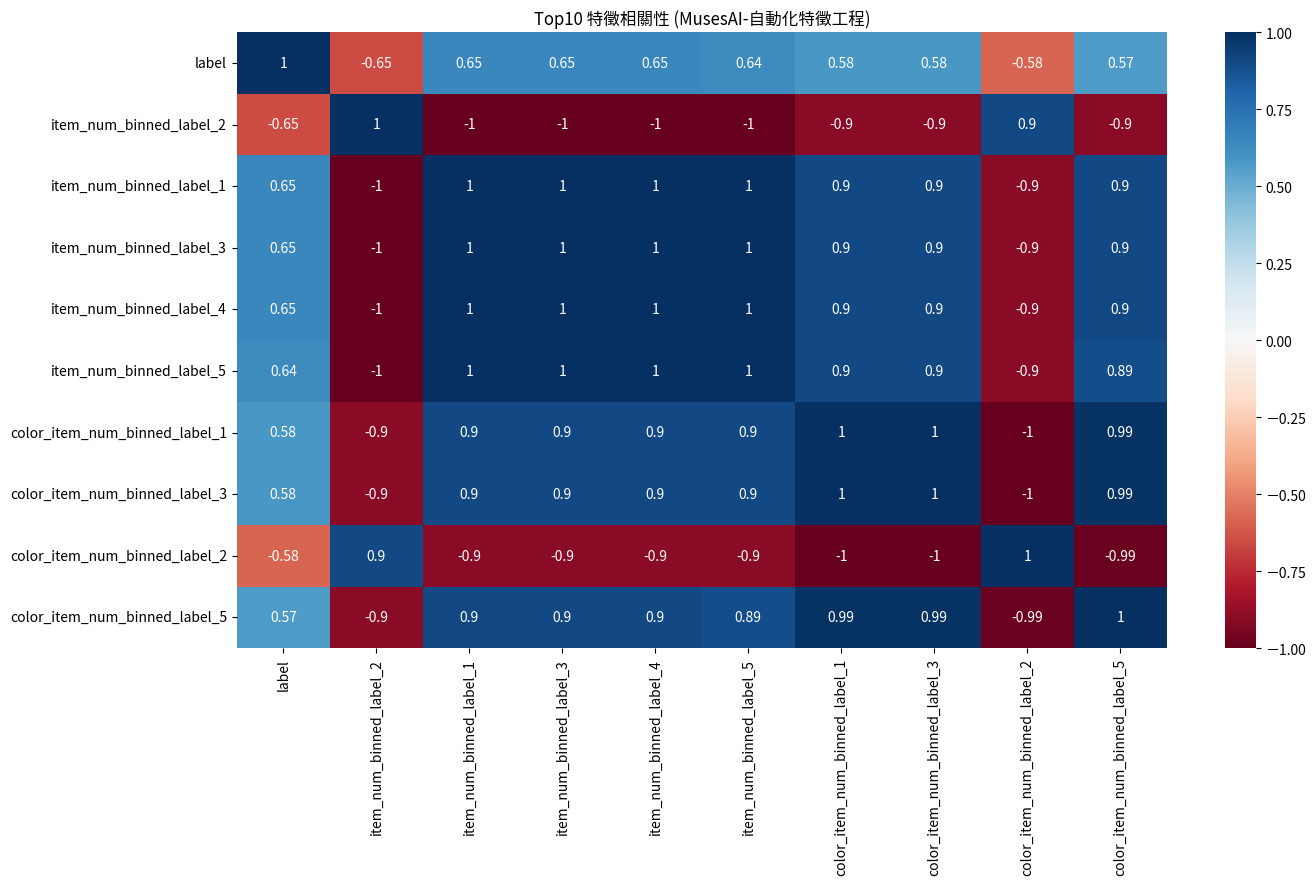

In [23]:
plt.figure(figsize=(15, 8))

sns.heatmap(data = corr, annot=True, cmap = 'RdBu')
# plt.xticks(rotation = 45)
title = 'Top10 特徵相關性 (MusesAI-自動化特徵工程)'
plt.title(title)
plt.show()